# Notebook activity 7.10 Diagnostic plots for a GLM for `examScore`

In Notebook activity 7.8, we used R to carry out stepwise regression to choose a binomial GLM with a logit link for the response `examScore` from the OU students dataset. In that notebook activity, the model chosen when using stepwise regression starting from the full model was: 

`examScore ~ gender * qualLink * bestPrevModScore * age`.
    
In this notebook activity, we'll obtain the diagnostic plots for this model so that we can check the assumptions of the GLM.

The data are stored in the data frame `ouStudents`.

## (a) Getting started

### (i)

Start by running the following code.

In [ ]:
# Load the M348 package
library(M348)
# Load the ouStudents data frame
data(ouStudents)
# Check the data frame has loaded OK
head(ouStudents)

## (b) Response data matrix for a binomial response

As usual for a binomial response, we need to define a matrix as our response which contains the numbers of 'successes' in each set of binomial trials in the first column, and the numbers of 'failures' in the second column. 

### (i)

Run the code below to create, and add to `ouStudents`, the response matrix `examScoreMatrix` containing the numbers of 'successes' (in the variable `examScore`) in the first column and the number of 'failures' (calculated as `100 - examScore`) in the second column. Note that this will not produce any output. 

In [2]:
ouStudents$examScoreMatrix <- cbind(ouStudents$examScore, 100 - ouStudents$examScore)

## (c) Fit the model chosen by stepwise regression starting from the full model

### (i)

Use the empty code cell below to fit the model:

`examScore ~ gender * qualLink * bestPrevModScore * age`,

using a binomial GLM with a logit link. (Remember that we need to fit the response matrix `examScoreMatrix` when using the `glm()` function for binomial responses.)

Store the results from fitting the model in the object `modelFitFull`.

#### Solution <a class="tocSkip">

The required code is given below. Running the code will fit the model, but won't produce any output.

In [3]:
modelFitFull <- glm(examScoreMatrix ~ gender * qualLink * bestPrevModScore * age, 
                    family = binomial, data = ouStudents)

## (d) Diagnostic plots for the fitted model

 
Notebook activity 6.10 introduced a bespoke R function written for M348, which can produce diagnostic plots for GLMs.

The function is called `glmResidPlot()` (which stands for 'generalised linear model residual plots'). Like the `plot()` function, we first need to fit our model and store the results in an object, `modelFit` say, and then this object is the argument of the function - that is, to produce diagnostic plots for a fitted GLM stored in `modelFit`, we use the command:

`glmResidPlot(modelFit)`.

In each produced plot, the residuals that are used are standardised deviance residuals. So the four diagnostic plots obtained using this function are the same four types of plot considered in Subsection 6.2 of Unit 7.

### (i)

Use the empty code cell below to produce diagnostic plots for the fitted GLM stored in `modelFitFull`. 

#### Solution <a class="tocSkip">

The required code and resulting plots are given below.

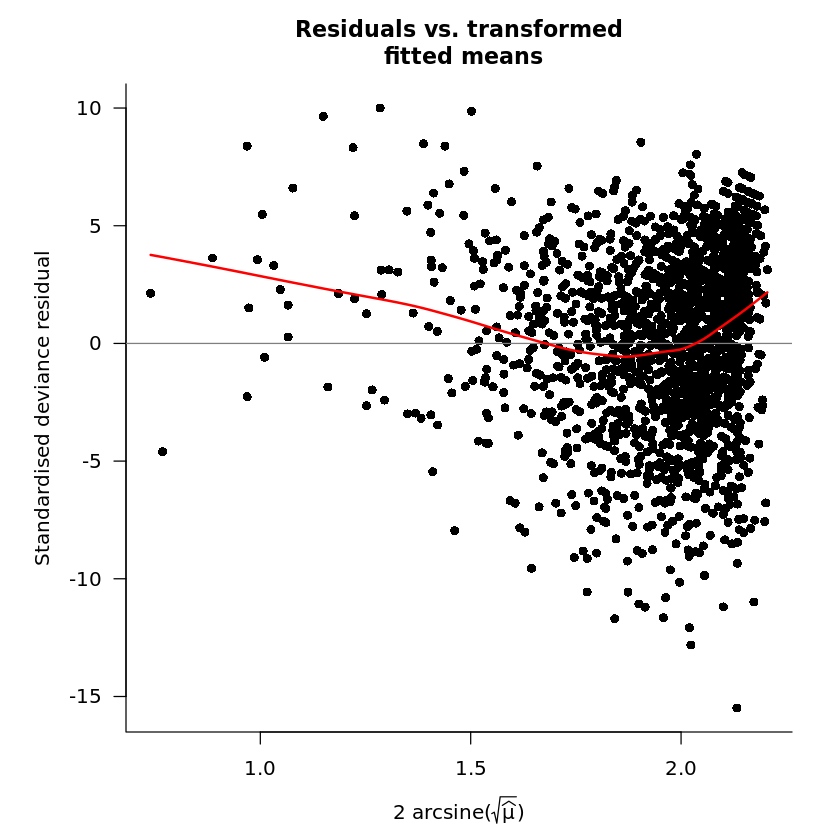

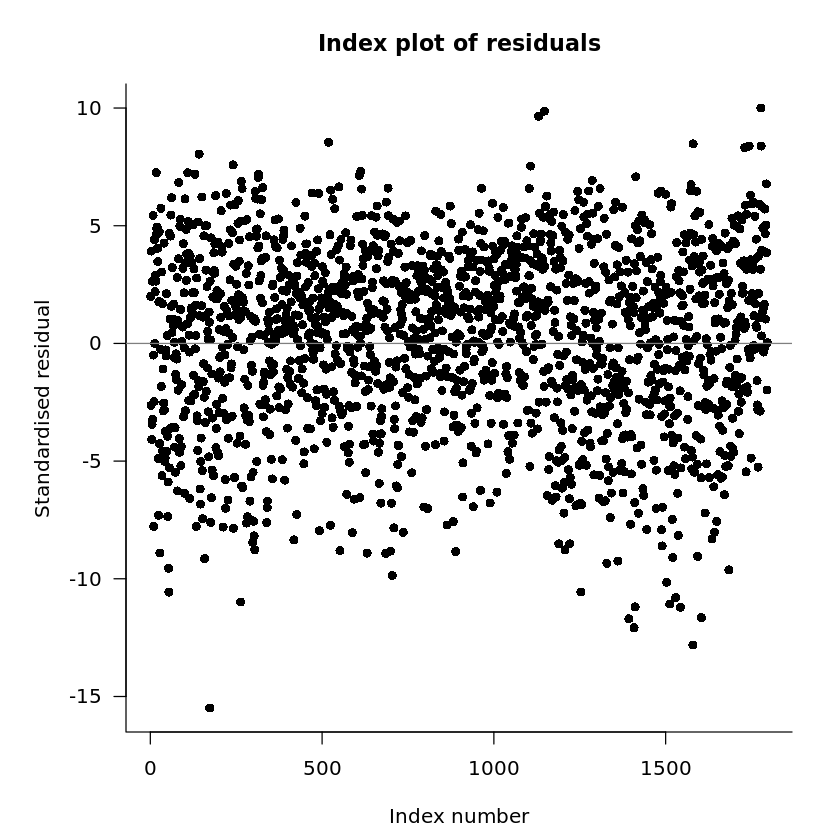

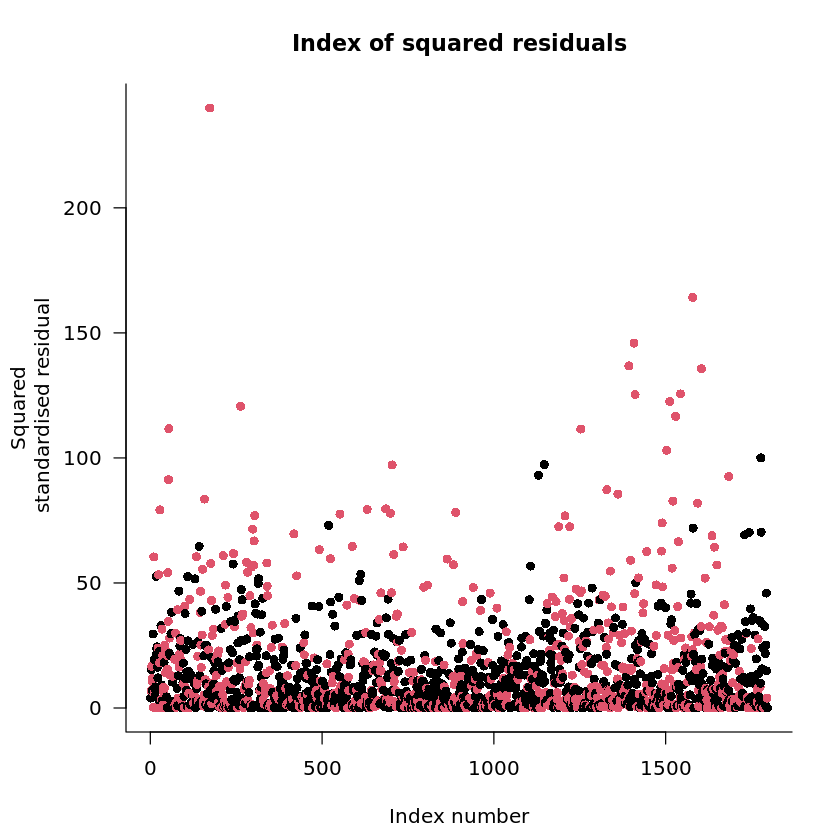

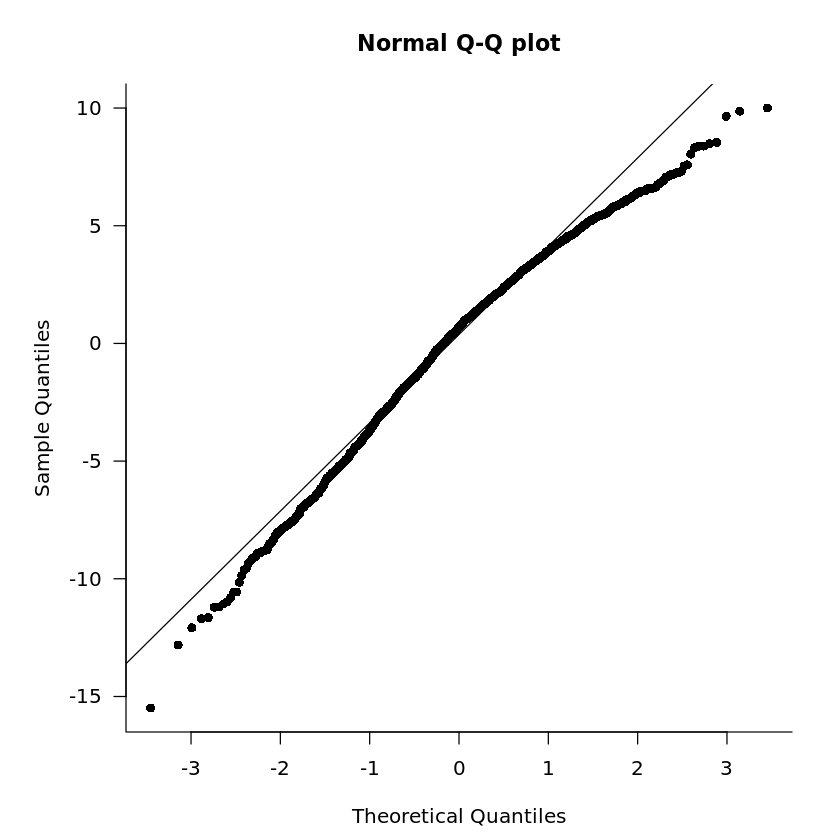

In [4]:
glmResidPlot(modelFitFull)

### (ii)

Do any of the plots you produced in part (i) suggest any problems with the GLM assumptions for this model?

#### Solution <a class="tocSkip">

On the plot of the standardised deviance residuals against a transformation of the response mean the smoothed red line appears to be generally downward sloping before kicking up at the end. This suggests that the model is generally predicting values that are too low for small values of the transformed fitted mean. Overall this casts some doubt on the linearity assumption, indicating that the logit link function may not be appropriate or that we may be missing some higher order terms in the model for one or more of the explanatory variables. 

There seems to be a suggestion of increasing variation as the index number increases in the plots of standardised deviance residuals against index and squared standardised deviance residuals against index. As such, the assumption of independence might be questionable. Now, the data stored in the OU students dataset contains data for students who have studied level 3 OU statistics modules on presentations with October start dates between 2015 and 2020. It is therefore possible that the order of the observations reflects the date order of presentations, and that there could have been more variability in certain years. It would be worth investigating this further.

Finally, the normal probability plot of the standardised deviance residuals looks *very* similar to the normal probability plot of the residuals that we had when modelling `examScore` using linear regression. That plot was shown in Figure 21 (Subsection 4.2, Unit 7). As such, modelling `examScore` using a GLM with a binomial response and logit link doesn't seem to have solved the problem of the questionable normality assumption arising from fitting a linear regression model!